In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from haversine import haversine, Unit
from datetime import date
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [132]:
train=pd.read_csv('fraudTrain.csv')

In [133]:
test=pd.read_csv('fraudTest.csv')

In [134]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [135]:
test.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [136]:
# Dropping unncessary columns

In [137]:
train.drop(columns=['Unnamed: 0','trans_date_trans_time','first','last','street','trans_num','unix_time','cc_num'],inplace=True)
test.drop(columns=['Unnamed: 0','trans_date_trans_time','first','last','street','trans_num','unix_time','cc_num'],inplace=True)

In [138]:
train.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0


In [139]:
# Exploratory analysis

In [140]:
train.isnull().sum()

merchant      0
category      0
amt           0
gender        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  object 
 4   city        1296675 non-null  object 
 5   state       1296675 non-null  object 
 6   zip         1296675 non-null  int64  
 7   lat         1296675 non-null  float64
 8   long        1296675 non-null  float64
 9   city_pop    1296675 non-null  int64  
 10  job         1296675 non-null  object 
 11  dob         1296675 non-null  object 
 12  merch_lat   1296675 non-null  float64
 13  merch_long  1296675 non-null  float64
 14  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 148.4+ MB


In [142]:
train.describe()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,5.109788e+00,1.377109e+01,7.586269e-02
min,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.000000e+00
25%,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,3.473357e+01,-9.689728e+01,0.000000e+00
50%,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,3.936568e+01,-8.743839e+01,0.000000e+00
75%,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,4.195716e+01,-8.023680e+01,0.000000e+00
max,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00


In [143]:
train.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

In [144]:
train['merchant'].value_counts()

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Treutel-King                       775
fraud_Douglas, DuBuque and McKenzie      775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64

In [145]:
train['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

<BarContainer object of 14 artists>

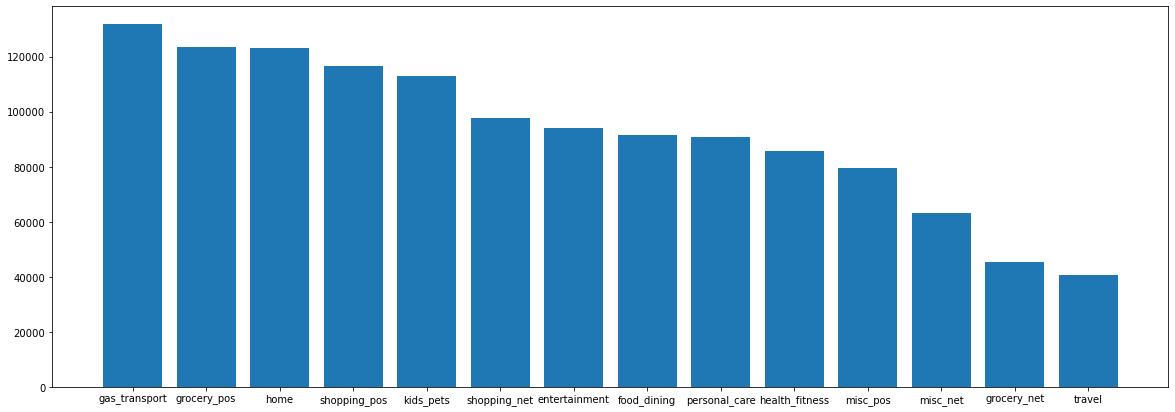

In [146]:
plt.figure(figsize=(20,7))
plt.bar(train['category'].value_counts().index,train['category'].value_counts())

In [147]:
train['amt'].value_counts()

1.14       542
1.04       538
1.25       535
1.02       533
1.01       523
          ... 
721.54       1
765.63       1
538.87       1
1122.06      1
981.17       1
Name: amt, Length: 52928, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

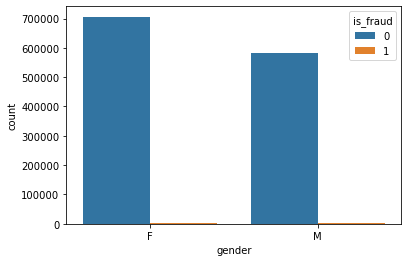

In [148]:
sns.countplot(train['gender'],hue=train['is_fraud'])

In [149]:
train['city'].value_counts()

Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Bruce             7
Chattanooga       7
Karns City        7
Vacaville         7
Claypool          7
Name: city, Length: 894, dtype: int64

In [150]:
train['state'].value_counts()

TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: state, dtype: int64

In [151]:
train['job'].value_counts()

Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Veterinary surgeon               8
Information officer              8
Warehouse manager                7
Contracting civil engineer       7
Ship broker                      7
Name: job, Length: 494, dtype: int64

In [152]:
# Feature engineering

In [153]:
# Datetime conversion

In [154]:
train['dob']=pd.to_datetime(train['dob'])

In [155]:
test['dob']=pd.to_datetime(test['dob'])

In [156]:
# Distance calculation

In [157]:
distance=[]
i=0
while i<len(train):
    distance.append(haversine((train['merch_lat'][i],train['merch_long'][i]),(train['lat'][i],train['long'][i]),unit=Unit.KILOMETERS))
    
    i=i+1                

In [158]:
train['distance']=distance

In [159]:
distance_test=[]
i=0
while i<len(test):
    distance_test.append(haversine((test['merch_lat'][i],test['merch_long'][i]),(test['lat'][i],test['long'][i]),unit=Unit.KILOMETERS))
    
    i=i+1    

In [160]:
test['distance']=distance_test

In [161]:
train.drop(columns=['merch_lat','merch_long','lat','long'],inplace=True)
test.drop(columns=['merch_lat','merch_long','lat','long'],inplace=True)

In [162]:
# Calculating age

In [163]:
def calculateAge(birthDate):
    today = date.today()
    age = today.year - birthDate.year
    return age

In [164]:
ages=[]
i=0
while i<len(train):
    ages.append(calculateAge(train['dob'][i]))
    i=i+1

In [165]:
train['Age']=ages

In [166]:
train.drop(columns=['dob'],inplace=True)

In [167]:
ages_test=[]
i=0
while i<len(test):
    ages_test.append(calculateAge(test['dob'][i]))
    i=i+1

In [168]:
test['Age']=ages_test


In [169]:
test.drop(columns=['dob'],inplace=True)

In [170]:
train.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip',
       'city_pop', 'job', 'is_fraud', 'distance', 'Age'],
      dtype='object')

In [171]:
# Label encoding and scaling

In [172]:
le=LabelEncoder()
train['merchant']=le.fit_transform(train['merchant'])
train['category']=le.fit_transform(train['category'])
train['city']=le.fit_transform(train['city'])
train['state']=le.fit_transform(train['state'])
train['job']=le.fit_transform(train['job'])
train['gender']=le.fit_transform(train['gender'])

In [173]:
train

,merchant,category,amt,gender,city,state,zip,city_pop,job,is_fraud,distance,Age
0,514,8,4.97,0,526,27,28654,3495,370,0,78.597677,34
1,241,4,107.23,0,612,47,99160,149,428,0,30.212217,44
2,390,0,220.11,1,468,13,83252,4154,307,0,108.206232,60
3,360,2,45.00,1,84,26,59632,1939,328,0,95.673363,55
4,297,9,41.96,1,216,45,24433,99,116,0,77.556851,36
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,15.56,1,330,44,84735,258,215,0,119.752302,61
1296671,2,1,51.70,1,813,20,21790,100,360,0,75.104189,43
1296672,599,1,105.93,1,346,32,88325,899,308,0,99.047870,55
1296673,509,1,74.90,1,471,41,57756,1126,485,0,84.627769,42


In [174]:
sc=StandardScaler()
train['amt']=sc.fit_transform(np.array(train['amt']).reshape(-1,1))
train['city_pop']=sc.fit_transform(np.array(train['city_pop']).reshape(-1,1))
train['distance']=sc.fit_transform(np.array(train['distance']).reshape(-1,1))
train['Age']=sc.fit_transform(np.array(train['Age']).reshape(-1,1))

In [175]:
# Test data

In [176]:
le=LabelEncoder()
test['merchant']=le.fit_transform(test['merchant'])
test['category']=le.fit_transform(test['category'])
test['city']=le.fit_transform(test['city'])
test['state']=le.fit_transform(test['state'])
test['job']=le.fit_transform(test['job'])
test['gender']=le.fit_transform(test['gender'])

In [177]:
sc=StandardScaler()
test['amt']=sc.fit_transform(np.array(test['amt']).reshape(-1,1))
test['city_pop']=sc.fit_transform(np.array(test['city_pop']).reshape(-1,1))
test['distance']=sc.fit_transform(np.array(test['distance']).reshape(-1,1))
test['Age']=sc.fit_transform(np.array(test['Age']).reshape(-1,1))

In [178]:
y_train=train['is_fraud']
y_test=test['is_fraud']

In [179]:
train.drop(columns=['is_fraud'],inplace=True)
test.drop(columns=['is_fraud'],inplace=True)

In [180]:
one_hot_enc=OneHotEncoder()
X_train=one_hot_enc.fit_transform(train)
X_test=one_hot_enc.fit_transform(test)

In [181]:
# Logistic regression

In [182]:
lr=LogisticRegression()
lr.fit(train,y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [183]:
preds=lr.predict(test)

In [184]:
accuracy_score(y_test,preds)

0.9956596769230492

In [187]:
# knn

In [193]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(train,y)
pred_knn=knn.predict(test)

In [194]:
accuracy_score(y_test,pred_knn)

0.9961545313368807

In [195]:
# Naive bayes

In [197]:
nb=GaussianNB()
nb.fit(train,y)
pred_nb=nb.predict(test)

In [198]:
accuracy_score(y_test,pred_nb)

0.9939231877981498

In [199]:
# Decision tree

In [200]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(train,y)
dec_tree_preds=dec_tree.predict(test)

In [201]:
accuracy_score(y_test,dec_tree_preds)

0.996483834455903